# QDA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [8]:
#%% Get dataset
data1 = pd.read_excel("Sujet1.xlsx",sheet_name=0,header=0,index_col=0)
X1=data1.dropna() #si j'ai de valeurs manquant je le suprimme

data2 = pd.read_excel("Sujet2.xlsx",sheet_name=0,header=0,index_col=0)
X2=data2.dropna() #si j'ai de valeurs manquant je le suprimme

data3 = pd.read_excel("Sujet3.xlsx",sheet_name=0,header=0,index_col=0)
X3=data3.dropna() #si j'ai de valeurs manquant je le suprimme

In [9]:
#%% Criação dos boxplots=
X=X1

bands = ['delta', 'theta', 'alpha', 'sigma', 'beta']

plt.figure(figsize=(12, 8))
 
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

#lda_1 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
qda_1= QuadraticDiscriminantAnalysis()
X_qda_1 = qda_1.fit(XX, y)



<Figure size 1200x800 with 0 Axes>

In [10]:

X=X2

bands = ['delta', 'theta', 'alpha', 'sigma', 'beta']

plt.figure(figsize=(12, 8))

# Analyse Quadrqtrique
n,p=X.shape
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

#lda_1 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
qda_2= QuadraticDiscriminantAnalysis()
X_qda_2 = qda_2.fit(XX, y)



<Figure size 1200x800 with 0 Axes>

In [11]:
X=X3

# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

#lda_1 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
qda_3= QuadraticDiscriminantAnalysis()
X_qda_3 = qda_3.fit(XX, y)



# 2.2 

Sujet1 - Accuracy: 0.828
Sujet1 - Balanced Accuracy: 0.790

Sujet2 - Accuracy: 0.864
Sujet2 - Balanced Accuracy: 0.842

Sujet3 - Accuracy: 0.835
Sujet3 - Balanced Accuracy: 0.861



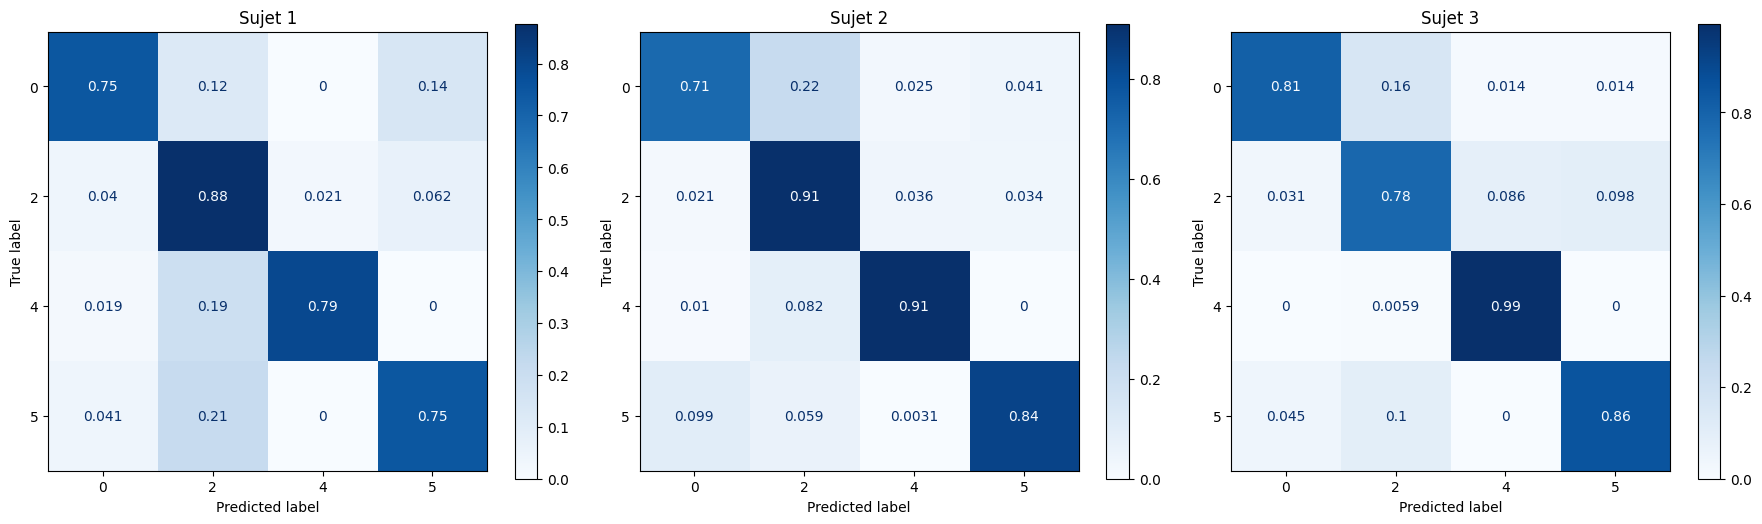

In [13]:
# IA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
import matplotlib.pyplot as plt
# Inicializar QDA com regularização
qda_1 = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda_2 = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda_3 = QuadraticDiscriminantAnalysis(reg_param=0.1) # So garantindo que a matrzi seja inversivel(foizemso com IA, pois tava gerando warning)
# Listas de dados e modelos
datasets = [X1, X2, X3]
qdas = [qda_1, qda_2, qda_3]
labels = ['0', '2', '4', '5']

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 linha, 3 colunas

for i, (data, qda) in enumerate(zip(datasets, qdas)):
    # Separar features e labels
    X_features = data[['delta', 'theta', 'alpha', 'sigma', 'puissance']]
    y_labels = data['phase']

    # Separar treino e validação
    X_train = X_features.iloc[0:420]
    y_train = y_labels.iloc[0:420]
    X_test = X_features.iloc[420:]
    y_test = y_labels.iloc[420:]

    # Treinar LDA
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred,normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues',ax=axes[i], colorbar=True)
    axes[i].set_title(f"Sujet {i+1}")

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Sujet{i+1} - Accuracy: {acc:.3f}")
    # Balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Sujet{i+1} - Balanced Accuracy: {bal_acc:.3f}\n")

plt.tight_layout()
plt.show()
